# Ungraded Lab: Gradient Descent for Logistic Regression

In this lab, you will implement the gradient descent update step for logistic regression.

## Dataset 
Let's start with the same dataset as before.

In [5]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

As before, we'll use a helper function to plot this data. The data points with label $y=1$ are shown as red crosses, while the data points with label $y=0$ are shown as black circles.

Text(0.5, 0, '$x_1$')

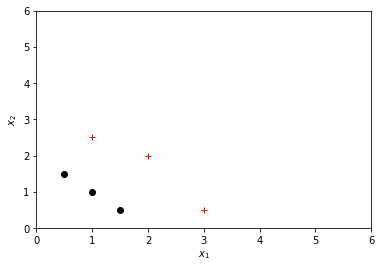

In [6]:
from lab_utils import plot_data
import matplotlib.pyplot as plt

plot_data(X,y)

# Set both axes to be from 0-6
plt.axis([0, 6, 0, 6])
# Set the y-axis label
plt.ylabel('$x_2$')
# Set the x-axis label
plt.xlabel('$x_1$')

## Gradient descent

 First, you will implement a non-vectorized version of the gradient. Then, you will implement a vectorized version.


### Non- vectorized version

Recall that in gradient descent, each iteration performs the update:

$$w_j :=w_j - \alpha \frac{\partial J(\mathbf{w})}{\partial w_j} \tag{1}$$ 

simultaneously update $w_j$ for all $j$, where

$$ \frac{\partial J(\mathbf{w})}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{\mathbf{\mathbf{w}}}(\mathbf{x}^{(i)}) - y^{(i)})x_j^{(i)}\tag{2}$$ 

- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_w(x)$.

You'll implement $\frac{\partial J(\mathbf{w})}{\partial w_j}$ in this lab. 
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w}}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

* For a logistic regression model for the dataset given above, the model can be representented as:

    $f_{\mathbf{w}}(x) = g(w_0 + w_1x_1 + w_2x_2)$

    where $g(z)$ is the sigmoid function:

    $g(z) = \frac{1}{1+e^{-z}}$ 
    
    
* **Preprocessing step** 

   For ease of implementation, we will add an additional column of ones to $X$ (as $x_0$) so that  
    $f_{\mathbf{w}}(x) = g(w_0x_0 + w_1x_1 + w_2x_2)$
    
    By doing this, to calculate the prediction from the model $f_{\mathbf{w}}(x)$, we can write a for loop that calculates $w_jx_j$ at each step

In [7]:
# Add a column to X_orig to account for the w_0 term
X_mod = np.hstack([np.ones((X.shape[0],1)), X])

print(X_mod)

[[1.  0.5 1.5]
 [1.  1.  1. ]
 [1.  1.5 0.5]
 [1.  3.  0.5]
 [1.  2.  2. ]
 [1.  1.  2.5]]


#### Side Note: sigmoid function implementation
We've implemented the `sigmoid` function for you already and you can simply import and use it, as shown in the code block below.

In [8]:
from lab_utils import sigmoid 

print(sigmoid(0))

0.5


#### Implementation

Now, you'll implement the non-vectorized version of the gradient. We've already provided some starter code for you which does the following -
* We create an array to hold the gradients (called `dw`) with the same shape as $w$ and initialize it with zeros. We will update and return `dw` 
* There is a for loop to calculate `dw[j]` at each iteration
* At each iteration, we can use the gradient formula above, which involves another for loop over all the examples in the dataset
* We store the gradient value for each example in a list and the gradient `dw[j]` is then computed as the sum of gradient for each example divided by the number of examples

We assume that the function takes in the paramaters $w$ as a list/array.

**Exercise**

You'll complete the cost function by implementing the following steps inside the inner for loop - 

* First, you'll compute the models prediction $f_\mathbf{w}(\mathbf{x}^{(i)})$ for a single data point at index $i$ as shown below

   ```
   z = 0
   for j in range(n):
       z += w[j] * X[i][j]
   f = sigmoid(z)
   ```
   
   Since $w_0x_0 + w_1x_1+w_2x_2 = \mathbf{w}\cdot \mathbf{x}$, you can also calculate  $f_\mathbf{w}(\mathbf{x}^{(i)})$ as 
   ```
   z = np.dot(w, X[i])
   f = sigmoid(z)
   ```

* Then, you'll compute the gradient for the single data point at index $i$ as 

  ```
  gradient = (f-y[i])*X[i][j] 
  ```


In [16]:
def compute_gradient(X, y, w):
    # Here X is assumed to pre-processed with a column of ones added as x_0
    m, n = X.shape
    dw = np.zeros_like(w)
    
    for j in range(n):
        gradient_list = []
        
        for i in range(m):        
            ### START CODE HERE ### 

            ### END CODE HERE ### 
            gradient_list.append(gradient)
        
        dw[j] = (1/m)* sum(gradient_list)
        
    return dw

Check the implementation of your gradient function using the cell below.

In [17]:
w = np.zeros(3)
compute_gradient(X_mod,y,w)

array([ 0.        , -0.25      , -0.16666667])

**Expected output**

array([ 0.        , -0.25      , -0.16666667])

### (Optional ) Vectorized version

You will now implement a vectorized version of the gradient function.

The vectorized version of the gradient formula is 

$$\frac{\partial \mathbf{J}(w_j)}{\partial \mathbf{w}} = \frac{1}{m} \mathbf{X^T}(\mathbf{f} - \mathbf{y})$$ 

where

$$ \mathbf{f} = g(\mathbf{X}  \mathbf{w})$$

As before, $g$ is the sigmoid function


**Exercise**

You'll complete the vectorized cost function by implementing the following steps - 

* First, you'll compute the models prediction $f(x)$ as shown below

   ```
   z = np.dot(X, w)
   f = sigmoid(z)
   ```
  

* Then, you'll compute the gradient as 

  ```
  dw = (1/m)*np.matmul(X.T, (f - y))
  ```


**Debugging Tip:** Vectorizing code can sometimes be tricky. One common strategy for debugging is to print out the sizes of the matrices you are working with using the size function. For example, given a data matrix $\mathbf{X}$ of size 6 × 3 (6 examples, 3 features) and $\mathbf{w}$, a vector with dimensions 3x1, you can observe that $\mathbf{Xw}$ is a valid multiplication operation, while $\mathbf{wX}$ is not.

In [23]:
def compute_gradient_vectorized(X, y, w):
    
    m, n = X.shape
    
    ### START CODE HERE ### 

    ### START CODE HERE ### 
    return dw

Now let's check if the output of this function is equivalent to the output of your non-vectorized implementation above.

In [24]:
print("Cost computed by non-vectorized version: ", compute_gradient(X_mod, y, w))
print("Cost computed by vectorized version: ", compute_gradient_vectorized(X_mod, y, w))

Cost computed by non-vectorized version:  [ 0.         -0.25       -0.16666667]
Cost computed by vectorized version:  [ 0.         -0.25       -0.16666667]


**Expected output** 

Cost computed by non-vectorized version:  [ 0.         -0.25       -0.16666667]

Cost computed by vectorized version:  [ 0.         -0.25       -0.16666667]
